# МО в один клик.

# Описание проекта
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. 
Итак, нашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

# План выполнения проекта.
1. Загрузка данных: ознакомление с данными.
2. Предобработка данных. Проведем необходимую предобработку данных.
3. Исследовательский анализ данных. Проведем исследовательский анализ данных из каждой таблицы. Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформим выводы по результатам шага.
4. Объединение таблиц. Объединим таблицы market_file.csv, market_money.csv, market_time.csv. 
5. Корреляционный анализ. Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделаем выводы о мультиколлинеарности и при необходимости устраним её.
6. Использование пайплайнов. Создадим пайплайн для обработки данных и подбора лучшей модели и ее гиперпараметров.
7. Анализ важности признаков. Оцении важность признаков для лучшей модели и построем график важности с помощью метода SHAP. Сделаем выводы о значимости признаков. 
8. Сегментация покупателей. Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей. Выберим группу покупателей и предложим, как увеличить её покупательскую активность. Сделаем выводы о сегментах. 
9. Общий вывод.

Описание данных

market_file.csv <br>
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.<br>
id — номер покупателя в корпоративной базе данных.<br>
Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».<br>
Тип сервиса — уровень сервиса, например «премиум» и «стандарт».<br>
Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.<br>
Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.<br>
Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.<br>
Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.<br>
Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.<br>
Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.<br>
Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.<br>
Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.<br>
Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.<br>
Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.<br>
<br>
market_money.csv<br>
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.<br>
id — номер покупателя в корпоративной базе данных.<br>
Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.<br>
Выручка — сумма выручки за период.<br>
<br>
market_time.csv<br>
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.<br>
id — номер покупателя в корпоративной базе данных.<br>
Период — название периода, во время которого зафиксировано общее время.<br>
минут — значение времени, проведённого на сайте, в минутах.<br>
<br>
money.csv<br>
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.<br>
id — номер покупателя в корпоративной базе данных.<br>
Прибыль — значение прибыли.<br>

Установим необходимый функционал и импортируем нееобходимые библиотеки.

In [468]:
pip install --upgrade pip -q

Note: you may need to restart the kernel to use updated packages.


In [469]:
!pip install phik -q

In [470]:
!pip install shap -q

In [471]:
!pip install scikit-learn==1.3.2 -q

In [472]:
# импортируем все необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn.inspection import permutation_importance
import shap
import phik
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (mean_squared_error, mean_absolute_error, confusion_matrix,
                             accuracy_score, precision_score, recall_score, r2_score, roc_auc_score)

##  Загрузка данных.

Сохраним в переменную основную таблицу.

In [473]:
market_file = pd.read_csv('/#####.csv')
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Приведем названия столбцов к змеиному регистру.

In [474]:
market_file.columns = market_file.columns.str.lower().str.replace(' ', '_')

Взглянем на общую информацию о таблице.

In [475]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

Видим, что формат данных соответствует истеному.

Сохраним таблицу с выручками по периодам.

In [476]:
market_money = pd.read_csv('/datasets/market_money.csv')
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Приведем названия столбцов к нижнему регистру.

In [477]:
market_money.columns = market_money.columns.str.lower()

Взглянем на общую информацию.

In [478]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Формат данных соответствует истеному.

Сохраним таблицу с временными периодами.

In [479]:
market_time = pd.read_csv('/datasets/market_time.csv')
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Приведем названия столбцов к нижнему регистру.

In [480]:
market_time.columns = market_time.columns.str.lower()

Взглянем на общую информацию.

In [481]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Формат данных соответствует истеному.

Сохраним таблицу с прибылью.

In [482]:
money_data = pd.read_csv('/datasets/money.csv',sep=';')
money_data.head()

,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


Привидем названия столбца к нижнему регистру и сразу заменим запятую на точку в числах.

In [483]:
money_data.columns = money_data.columns.str.lower()
money_data['прибыль'] = money_data['прибыль'].str.replace(',','.').astype('float')

Общая информация о таблице.

In [484]:
money_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Формат данных корректный.

###  Вывод по загрузке данных.
Названия столбцов были приведены к нижнему и змеиному регистрам. Для таблицы с прибылью в качестве разделителя числа была выбрана точка.

##  Предобработка данных.

###  Предобработка market_file.

Приведем значения в столбцах к нижнему змеиному регистру.

In [485]:
market_file['покупательская_активность'] = market_file['покупательская_активность'].str.lower()
market_file['популярная_категория'] = market_file['популярная_категория'].str.lower().str.replace(' ','_')
market_file['покупательская_активность'] = market_file['покупательская_активность'].str.replace(' ','_')
market_file.head(2)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5


Проверим уникальные значения в столбце 'покупательская_активность'. Данные в порядке.

In [486]:
market_file['покупательская_активность'].unique()

array(['снизилась', 'прежний_уровень'], dtype=object)

В столбце 'тип_сервиса' была обнаружена ошибка в записи : 'стандартт' и 'стандарт'. Исправим это.

In [487]:
market_file['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [488]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].str.replace('стандартт','стандарт')
market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [489]:
market_file['разрешить_сообщать'].unique()

array(['да', 'нет'], dtype=object)

In [490]:
market_file['популярная_категория'].unique()

array(['товары_для_детей', 'домашний_текстиль', 'косметика_и_аксесуары',
       'техника_для_красоты_и_здоровья', 'кухонная_посуда',
       'мелкая_бытовая_техника_и_электроника'], dtype=object)

В столбцах 'разрешить_сообщать' и 'популярная_категория' неявных дубликатов необнаружено.

Проверим пропуски и явные дубликаты.

In [491]:
market_file.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

In [492]:
market_file.duplicated().sum()

0

Пропусков и дублкатов нет.

### Предобработка market_money.

In [493]:
market_money.head(2)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1


In [494]:
market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [495]:
market_money.isna().sum()

id         0
период     0
выручка    0
dtype: int64

In [496]:
market_file.duplicated().sum()

0

Явных и неявных дубликатов не обнаружено, так же как и пропусков.

### Предобработка market_time.

In [497]:
market_time.head(2)

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13


Обнаружили опечатку в столбце 'период'. Исправим.

In [498]:
market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [499]:
market_time['период'] = market_time['период'].str.replace('предыдцщий_месяц','предыдущий_месяц')
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

In [500]:
market_time.isna().sum()

id        0
период    0
минут     0
dtype: int64

In [501]:
market_time.duplicated().sum()

0

Пропусков и дубликатов нет.

### Предобработка money_data.

In [502]:
money_data.head(2)

,id,прибыль
0,215348,0.98
1,215349,4.16


In [503]:
money_data.isna().sum()

id         0
прибыль    0
dtype: int64

In [504]:
money_data.duplicated().sum()

0

Пропусков и дубликатов нет.

### Вывод по предобраотке.
В столбце 'тип_сервиса' был обнаружен неявный дубликат : 'стандартт' и 'стандарт'. Обнаружили опечатку в столбце 'период'. В остальном данные впорядке, пропусков и дубликатов нет.

##  Исследовательский анализ данных.

In [505]:
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2


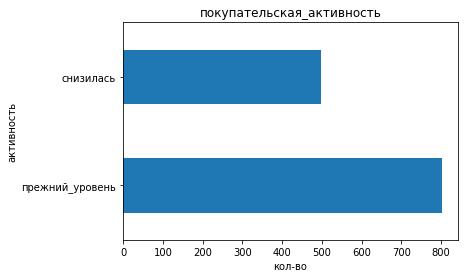

In [506]:
market_file['покупательская_активность'].value_counts().plot.barh()
plt.title('покупательская_активность')
plt.xlabel('кол-во')
plt.ylabel('активность')
plt.show()

Столбчатая диаграмма показывает, что покупательская активность клиентов в основном на прежнем уровне. При этом доля сниженой активности так же высока.

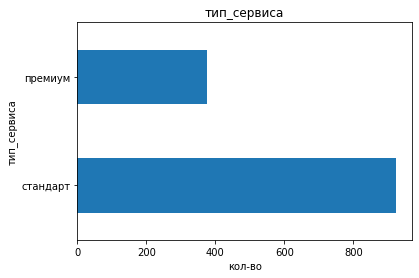

In [507]:
market_file['тип_сервиса'].value_counts().plot.barh()
plt.title('тип_сервиса')
plt.xlabel('кол-во')
plt.ylabel('тип_сервиса')
plt.show()

В основном люди используют стандартный тип сервиса.

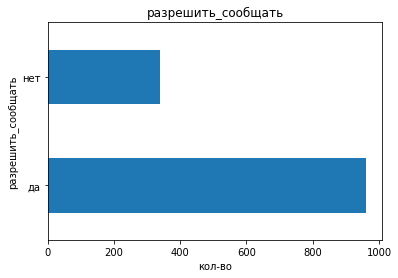

In [508]:
market_file['разрешить_сообщать'].value_counts().plot.barh()
plt.title('разрешить_сообщать')
plt.xlabel('кол-во')
plt.ylabel('разрешить_сообщать')
plt.show()

Можем наблидать, что клиенты достаточно охотно соглашаются на рассылку.

In [509]:
market_file['маркет_актив_6_мес'].describe()

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

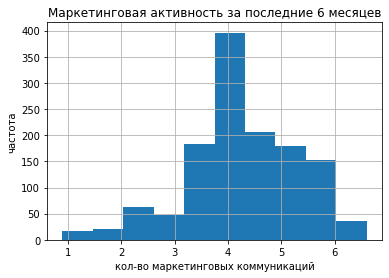

In [510]:
market_file['маркет_актив_6_мес'].hist()
plt.title('Маркетинговая активность за последние 6 месяцев')
plt.ylabel('частота')
plt.xlabel('кол-во маркетинговых коммуникаций')
plt.show()

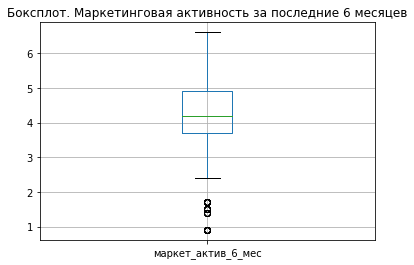

In [511]:
market_file.boxplot(column='маркет_актив_6_мес')
plt.title('Боксплот. Маркетинговая активность за последние 6 месяцев')
plt.show()

Кол-во маркетинговых коммуникаций, в соновном, лежит в диапозоне от 3.7 до 4.9. На боксплоте  видим 4 выброса в нижней части графика. Оставим эти данные т.к. они не повлияют на исследование.

In [512]:
market_file['маркет_актив_тек_мес'].describe()

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64

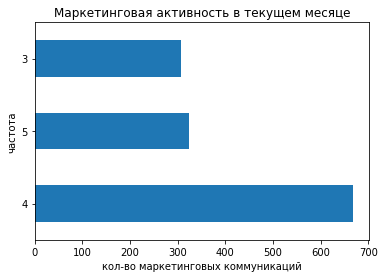

In [513]:
market_file['маркет_актив_тек_мес'].value_counts().plot.barh()
plt.title('Маркетинговая активность в текущем месяце')
plt.ylabel('частота')
plt.xlabel('кол-во маркетинговых коммуникаций')
plt.show()

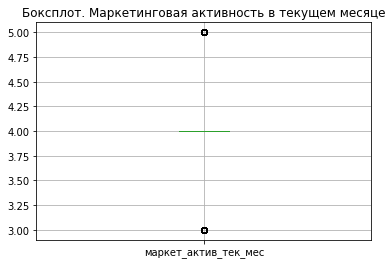

In [514]:
market_file.boxplot(column='маркет_актив_тек_мес')
plt.title('Боксплот. Маркетинговая активность в текущем месяце')
plt.show()

Маркетинговая активность в текущем месяце по большей части, находится в кол-ве 4 коммуникаций с клиентом.

In [515]:
market_file['длительность'].describe()

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64

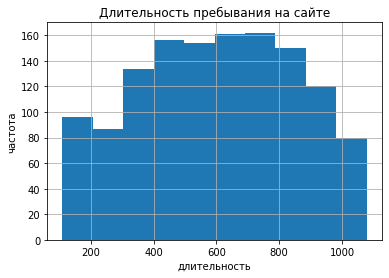

In [516]:
market_file['длительность'].hist()
plt.title('Длительность пребывания на сайте')
plt.ylabel('частота')
plt.xlabel('длительность')
plt.show()

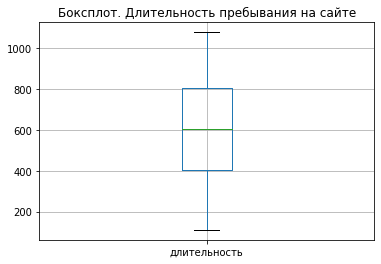

In [517]:
market_file.boxplot(column='длительность')
plt.title('Боксплот. Длительность пребывания на сайте')
plt.show()

В основном, длительность нахождения на сайте лежит в диапозоне от 405 до 806 дней.

In [518]:
market_file['акционные_покупки'].describe()

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

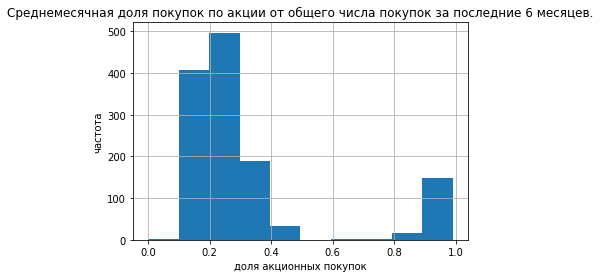

In [519]:
market_file['акционные_покупки'].hist()
plt.title('Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.')
plt.ylabel('частота')
plt.xlabel('доля акционных покупок')
plt.show()

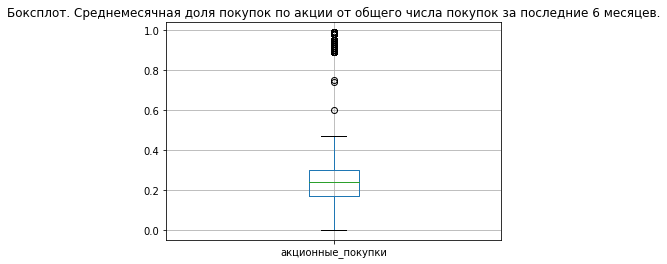

In [520]:
market_file.boxplot(column='акционные_покупки')
plt.title('Боксплот. Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.')
plt.show()

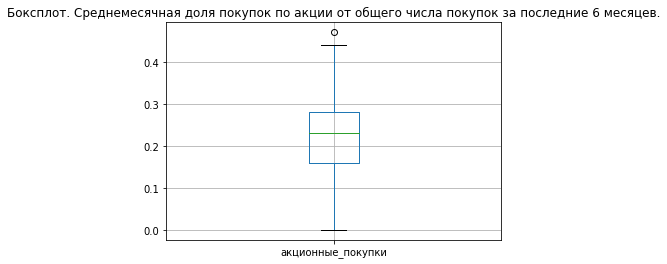

In [521]:
market_file[market_file['акционные_покупки'] < 0.5].boxplot(column='акционные_покупки')
plt.title('Боксплот. Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.')
plt.show()

Для большинства клиентов доля акционных покупок лежит в диапозоне от 17 до 30 процентов. На боксплоте видим выбросы в верхней части. Это клиенты, которые покупают практически только товары по акциям.

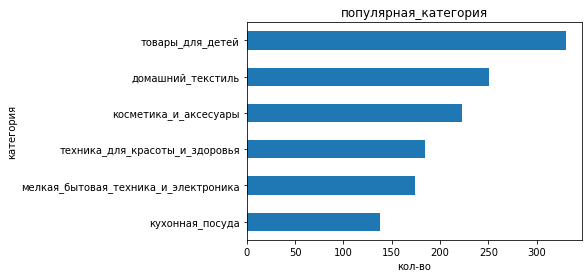

In [522]:
market_file['популярная_категория'].value_counts().sort_values().plot.barh()
plt.title('популярная_категория')
plt.xlabel('кол-во')
plt.ylabel('категория')
plt.show()

Среди популярных категорий: первое место - товары для детей, второе - домашний текстиль, третье - косметика и аксесуары, четвертое - техника для красоты и здоровья, пятое - мелкая бытовая техника и электроника.

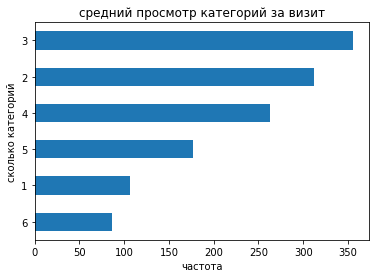

In [523]:
market_file['средний_просмотр_категорий_за_визит'].value_counts().sort_values().plot.barh()
plt.title('средний просмотр категорий за визит')
plt.xlabel('частота')
plt.ylabel('сколько категорий')
plt.show()

Среднее кол-во просмотренных категорий за визит: чаще всего - 3 просмотренных категории, следом 2 категории, далее 4 категории за визит, реже всего одна и шесть категорий за визит.

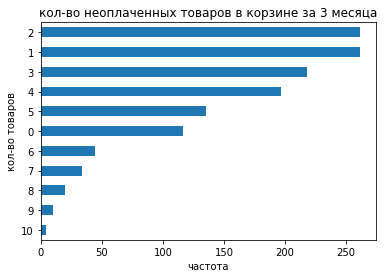

In [524]:
market_file['неоплаченные_продукты_штук_квартал'].value_counts().sort_values().plot.barh()
plt.title('кол-во неоплаченных товаров в корзине за 3 месяца')
plt.xlabel('частота')
plt.ylabel('кол-во товаров')
plt.show()

1-2 неоплаченных товара в корзине за 3 месяца - самое расппрастроненное явление. Далее по 3 и 4 товара. Следом 5 и 0. Остальные значения встречаются достаточно редко.

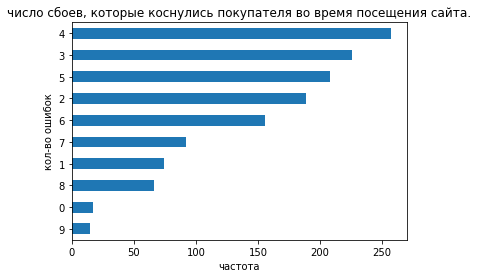

In [525]:
market_file['ошибка_сервиса'].value_counts().sort_values().plot.barh()
plt.title('число сбоев, которые коснулись покупателя во время посещения сайта.')
plt.xlabel('частота')
plt.ylabel('кол-во ошибок')
plt.show()

В основном, клиенты стлакиваются с 2-5 сбоями. Так же стоит заметить, что 0 сбоев - это практически такая же редкость как 9 сбоев. Это показывает, что сбои это , с чем клиенты регулярно имееют дело. 

In [526]:
market_file['страниц_за_визит'].describe()

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

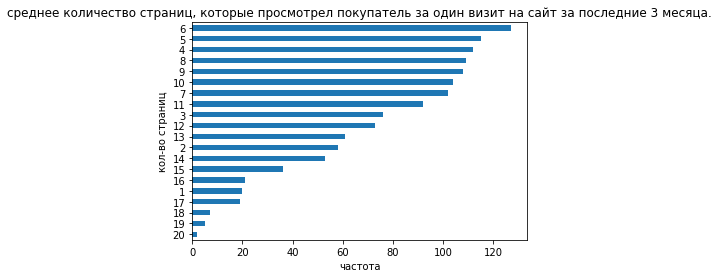

In [527]:
market_file['страниц_за_визит'].value_counts().sort_values().plot.barh()
plt.title('среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.')
plt.xlabel('частота')
plt.ylabel('кол-во страниц')
plt.show()

По статистике за 3 месяца, в основной массе, клиенты просматривают от 4 до 11 страниц за один визит. При этом одну страницу просматривают так же редко, как и большое кол-во сраниц(16 и выше).

In [528]:
market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


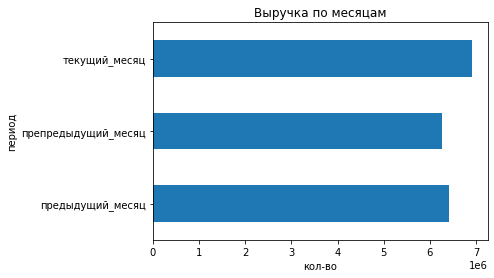

In [529]:
market_money.pivot_table(index='период', values='выручка', aggfunc='sum')['выручка'].plot.barh()
plt.title('Выручка по месяцам')
plt.xlabel('кол-во')
plt.show()

На графике можем наблюдать рост выручки в теченее последних месяцев.

In [530]:
market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


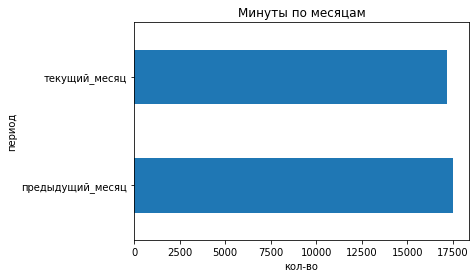

In [531]:
market_time.pivot_table(index='период', values='минут', aggfunc='sum')['минут'].plot.barh()
plt.title('Минуты по месяцам')
plt.xlabel('кол-во')
plt.show()

Время, проведенное пользователями на сайте, незначительно уменьшилось в текущем месяце.

In [532]:
money_data.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [533]:
money_data['прибыль'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

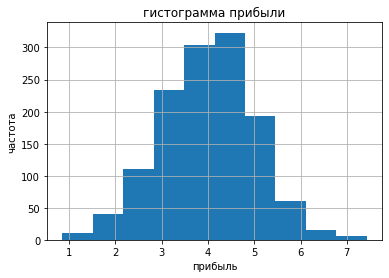

In [534]:
money_data['прибыль'].hist()
plt.title('гистограмма прибыли')
plt.xlabel('прибыль')
plt.ylabel('частота')
plt.show()

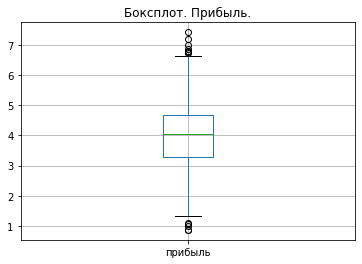

In [535]:
money_data.boxplot(column='прибыль')
plt.title('Боксплот. Прибыль.')
plt.show()

В основном, прибыль лежит в диапозоне от 3.3 до 4.7. На боксплоте видны выбросы в верхней и нежней части графика. Это говорит о присутсвии как сверхприбыльных, так и низкоприбыльных клиентах.

Для дальнейшего исследования нам нужно оставить только тех клиентов, у которых были покупки за последние 3 месяца.

In [536]:
# своодная таблица с выручкой по периодам
market_money_pivot = market_money.pivot_table(index='id',columns='период', values='выручка', aggfunc='sum')
market_money_pivot.head()

период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,0.0,0.0,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5


In [537]:
# top_clients - клиенты подходящие под требование 
top_clients = market_money_pivot[(market_money_pivot['предыдущий_месяц']!= 0)&
                                 (market_money_pivot['препредыдущий_месяц']!= 0)&
                                 (market_money_pivot['текущий_месяц']!= 0)].index.to_list()

In [538]:
# приминение фильтрации ко всем таблицам
market_file = market_file[market_file['id'].isin(top_clients)]
market_money = market_money[market_money['id'].isin(top_clients)]
market_time = market_time[market_time['id'].isin(top_clients)]
money_data = money_data[money_data['id'].isin(top_clients)]

In [539]:
market_file.shape

(1297, 13)

В ходе фильрации исключили всего трех клиентов.

###  Вывод по исследовательскому анализу.
1. Покупательская активность клиентов в основном на прежнем уровне. При этом доля сниженой активности так же высока.
2. В основном люди используют стандартный тип сервиса.
3. Клиенты достаточно охотно соглашаются на рассылку.
4. Кол-во маркетинговых коммуникаций, в соновном, лежит в диапозоне от 3.7 до 4.9. На боксплоте заметили 4 выброса в нижней части графика. Оставим эти данные т.к. они не повлияют на исследование.
5. Маркетинговая активность в текущем месяце по большей части, находится в кол-ве 4 коммуникаций с клиентом.
6. В основном, длительность нахождения на сайте лежит в диапозоне от 405 до 806 дней.
7. Для большинства клиентов доля акционных покупок лежит в диапозоне от 17 до 30 процентов. На боксплоте увидели выбросы в верхней части. Это клиенты, которые покупают практически только товары по акциям.
8. Среди популярных категорий: первое место - товары для детей, второе - домашний текстиль, третье - косметика и аксесуары, четвертое - техника для красоты и здоровья, пятое - мелкая бытовая техника и электроника.
9. Среднее кол-во просмотренных категорий за визит: чаще всего - 3 просмотренных категории, следом 2 категории, далее 4 категории за визит, реже всего одна и шесть категорий за визит.
10. 1-2 неоплаченных товара в корзине за 3 месяца - самое расппрастроненное явление. Далее по 3 и 4 товара. Следом 5 и 0. Остальные значения встречаются достаточно редко.
11. В основном, клиенты стлакиваются с 2-5 сбоями. Так же стоит заметить, что 0 сбоев - это практически такая же редкость как 9 сбоев. Это показывает, что сбои это , с чем клиенты регулярно имееют дело.
12. По статистике за 3 месяца, в основной массе, клиенты просматривают от 4 до 11 страниц за один визит. При этом одну страницу просматривают так же редко, как и большое кол-во сраниц(16 и выше).
13. На графике можем наблюдать рост выручки в теченее последних месяцев.
14. Время, проведенное пользователями на сайте, незначительно уменьшилось в текущем месяце.
15. В основном, прибыль лежит в диапозоне от 3.3 до 4.7. На боксплоте видны выбросы в верхней и нежней части графика. Это говорит о присутсвии как сверхприбыльных, так и низкоприбыльных клиентах. <br>
<br>
Для дальнейшего исследования оставили только тех клиентов, у которых были покупки за последние 3 месяца.

##  Объединение таблиц.

Для дальнейшей работы нам необходимо объединить таблицы. Предварительно создав новые столбцы: в таблице с минутами - 'минуты_предыдущий_месяц' и 'минуты_текущий_месяц', в таблице с выручкой - 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц' и 'выручка_текущий_месяц'.

In [540]:
time_pivot = market_time.pivot_table(index=['id'],columns=['период'],values=['минут'])
time_pivot.columns = ['минуты_предыдущий_месяц','минуты_текущий_месяц']
time_pivot = time_pivot.reset_index()
time_pivot.head()

,id,минуты_предыдущий_месяц,минуты_текущий_месяц
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10


In [541]:
money_pivot = market_money.pivot_table(index=['id'],columns=['период'],values=['выручка'])
money_pivot.columns = ['выручка_предыдущий_месяц','выручка_препредыдущий_месяц','выручка_текущий_месяц']
money_pivot = money_pivot.reset_index()
money_pivot.head()

,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


In [542]:
# объединение трех таблиц по столбцу "id"
market_file.reset_index(inplace=True,drop=True)
time_pivot.reset_index(inplace=True,drop=True)
money_pivot.reset_index(inplace=True,drop=True)
data = market_file.merge(time_pivot, on='id',how='inner').merge(money_pivot, on='id', how='inner')
data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минуты_предыдущий_месяц,минуты_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,12,10,5216.0,4472.0,4971.6
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.4
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,11,13,6158.0,4793.0,6610.4
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,8,11,5807.5,4594.0,5872.5
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,10,10,4738.5,5124.0,5388.5


Проверим размер, тип данных, пропуски и дубликаты в получившейся таблице.

In [543]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская_активность            1297 non-null   object 
 2   тип_сервиса                          1297 non-null   object 
 3   разрешить_сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                

In [544]:
data.shape

(1297, 18)

In [545]:
data.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
минуты_предыдущий_месяц                0
минуты_текущий_месяц                   0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
dtype: int64

In [546]:
data.duplicated().sum()

0

 ### Вывод по объединению таблиц.
 Как видим, объединение таблиц прошло успешно - размер, тип данных, пропуски и дубликаты в получившейся таблице совершенно корректны.

##  Корреляционный анализ

Проведем корреляционный анализ. Т.к. данные не имеют нормального расспределения будем использовать метод Спирмена. Так же построим тепловую и обычную матрицы phik.

In [547]:
data.drop(['id',
           'покупательская_активность','тип_сервиса','разрешить_сообщать',
           'популярная_категория'],axis=1).corr(method='spearman')

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минуты_предыдущий_месяц,минуты_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
маркет_актив_6_мес,1.000000,0.061697,-0.044614,-0.277968,0.185027,-0.134368,0.038656,0.319918,0.274003,0.226345,-0.005652,0.233325,-0.000126
маркет_актив_тек_мес,0.061697,1.000000,-0.131979,0.033045,-0.025158,0.061754,0.087351,0.003144,0.013538,-0.063044,-0.027107,-0.039397,-0.011791
длительность,-0.044614,-0.131979,1.000000,0.029186,-0.043150,-0.108822,0.103528,-0.034591,-0.124000,0.083035,0.013739,-0.039284,0.015214
акционные_покупки,-0.277968,0.033045,0.029186,1.000000,-0.203380,0.197624,-0.051590,-0.370853,-0.332743,-0.274693,0.007035,-0.267790,0.024214
средний_просмотр_категорий_за_визит,0.185027,-0.025158,-0.043150,-0.203380,1.000000,-0.251448,0.010034,0.267536,0.148376,0.233358,-0.049596,0.149619,-0.070814
неоплаченные_продукты_штук_квартал,-0.134368,0.061754,-0.108822,0.197624,-0.251448,1.000000,-0.098544,-0.165297,-0.183426,-0.214803,0.032958,-0.249421,0.060609
ошибка_сервиса,0.038656,0.087351,0.103528,-0.051590,0.010034,-0.098544,1.000000,0.104508,0.196017,0.078089,0.035383,0.090105,0.040390
страниц_за_визит,0.319918,0.003144,-0.034591,-0.370853,0.267536,-0.165297,0.104508,1.000000,0.450913,0.298113,-0.067879,0.311428,-0.050270
минуты_предыдущий_месяц,0.274003,0.013538,-0.124000,-0.332743,0.148376,-0.183426,0.196017,0.450913,1.000000,0.360375,-0.084632,0.348403,-0.143723
минуты_текущий_месяц,0.226345,-0.063044,0.083035,-0.274693,0.233358,-0.214803,0.078089,0.298113,0.360375,1.000000,-0.082747,0.299989,-0.164209


In [548]:
data.drop('id',axis=1).phik_matrix()

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']


,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минуты_предыдущий_месяц,минуты_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
покупательская_активность,1.000000,0.132247,0.000000,0.546370,0.000000,0.099820,0.506991,0.298036,0.539221,0.504870,0.223697,0.748769,0.685078,0.575662,0.223652,0.493370,0.000000
тип_сервиса,0.132247,1.000000,0.286278,0.094182,0.044796,0.404746,0.033339,0.066285,0.186635,0.140387,0.076182,0.100832,0.131084,0.000000,0.000000,0.064912,0.000000
разрешить_сообщать,0.000000,0.286278,1.000000,0.000000,0.051971,0.253618,0.017252,0.071769,0.069322,0.204526,0.020464,0.041128,0.042350,0.000000,0.069182,0.000000,0.000000
маркет_актив_6_мес,0.546370,0.094182,0.000000,1.000000,0.080454,0.000000,0.278729,0.149812,0.205783,0.274197,0.147270,0.394108,0.363780,0.328385,0.153128,0.313338,0.269222
маркет_актив_тек_мес,0.000000,0.044796,0.051971,0.080454,1.000000,0.177132,0.000000,0.136175,0.246726,0.140581,0.116310,0.000000,0.106879,0.062485,0.061530,0.000000,0.000000
длительность,0.099820,0.404746,0.253618,0.000000,0.177132,1.000000,0.000000,0.000000,0.190417,0.145909,0.188244,0.120363,0.044660,0.107206,0.130041,0.099332,0.000000
акционные_покупки,0.506991,0.033339,0.017252,0.278729,0.000000,0.000000,1.000000,0.122840,0.199417,0.240499,0.000000,0.310741,0.262189,0.250014,0.069144,0.224668,0.017594
популярная_категория,0.298036,0.066285,0.071769,0.149812,0.136175,0.000000,0.122840,1.000000,0.225622,0.251523,0.000000,0.160623,0.195219,0.089923,0.249578,0.047188,0.041051
средний_просмотр_категорий_за_визит,0.539221,0.186635,0.069322,0.205783,0.246726,0.190417,0.199417,0.225622,1.000000,0.322170,0.069908,0.262610,0.159393,0.182708,0.098538,0.176040,0.000000
неоплаченные_продукты_штук_квартал,0.504870,0.140387,0.204526,0.274197,0.140581,0.145909,0.240499,0.251523,0.322170,1.000000,0.043027,0.358553,0.256541,0.231617,0.192665,0.258201,0.000000


interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']


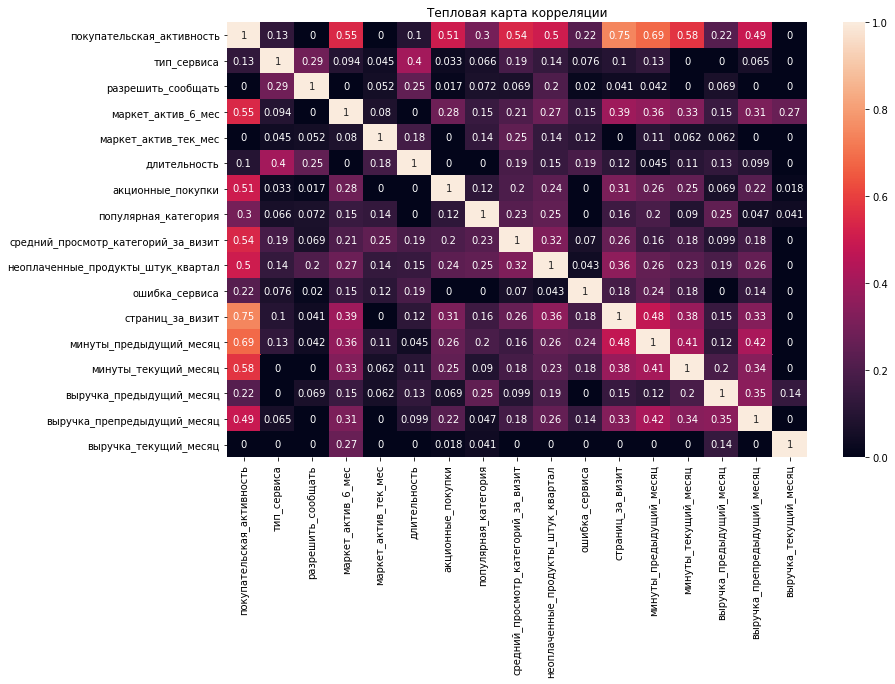

In [549]:
plt.figure(figsize=(13, 8))
sns.heatmap(data.drop('id',axis=1).phik_matrix(), annot=True) 
plt.title("Тепловая карта корреляции")
plt.show()

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']


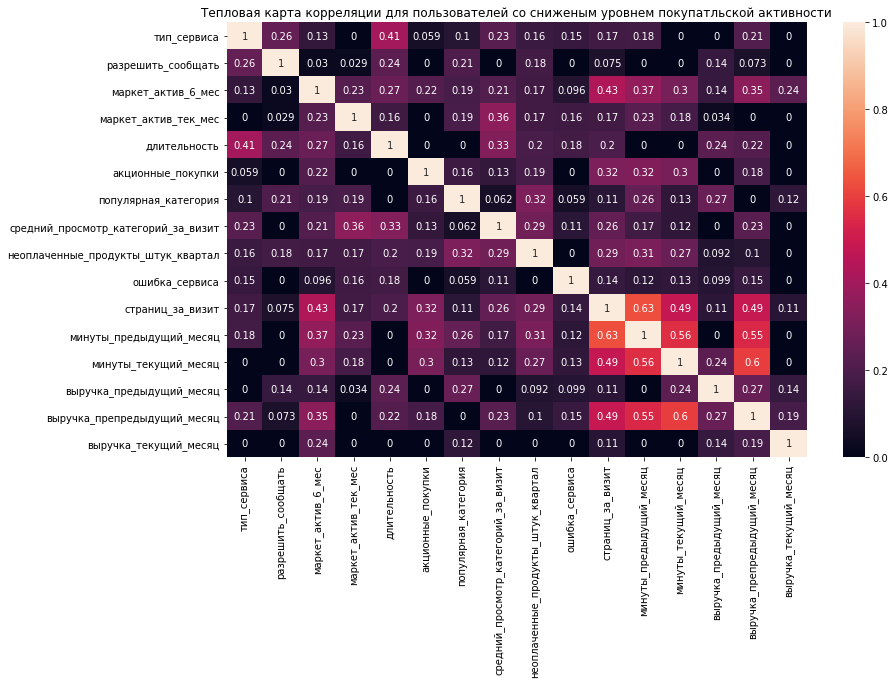

In [550]:
plt.figure(figsize=(13, 8))
sns.heatmap(data[data['покупательская_активность'] == 'снизилась'].drop(['id','покупательская_активность'],axis=1).phik_matrix(), annot=True) 
plt.title("Тепловая карта корреляции для пользователей со сниженым уровнем покупатльской активности")
plt.show()

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']


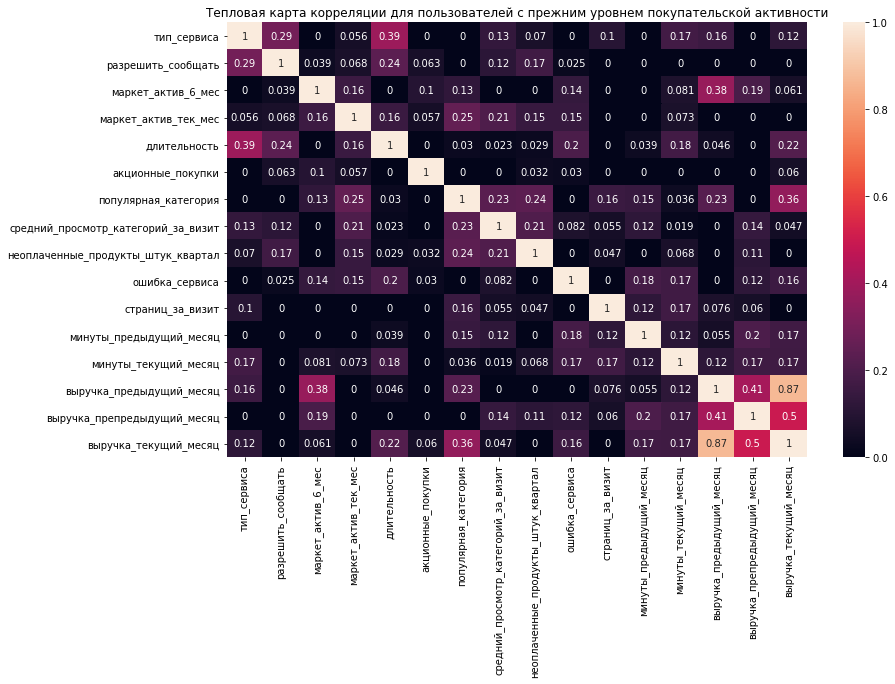

In [551]:
plt.figure(figsize=(13, 8))
sns.heatmap(data[data['покупательская_активность'] == 'прежний_уровень'].drop(['id','покупательская_активность'],axis=1).phik_matrix(), annot=True) 
plt.title("Тепловая карта корреляции для пользователей с прежним уровнем покупательской активности")
plt.show()

### Вывод по корреляционному анализу:
1. Наиболее высокая корреляция у целевого признака("покупательская_активность") с "страниц_за_визит" - 0.75.
2. Так же с признаком "минуты_предыдущий_месяц" корреляция составляет 0.69.
3. Для остальных признаков корреляция менее либо практически не выраженна.
4. В признаках не наблюдается мультиколлинеарности.
5. Для пользователей, чья покупательская активнось снизилась мы наблюдаем: <br>
        1) Более выраженную зависимость между кол-вом просмотренных страниц и минутами проведенными на сайте. Это вполне логично и не является чем то аномальным.<br>
        2) Так же наблюдается связь между выручкой в предыдущем месяце и временем проведенным на сайте в этом месяце.<br>
6. Пользователи с прежним уровнем покупательской активности:<br>
        1) Заметна выраженная зависимость между выручкой в текущем месяце и предыдущем - 0.87. Это можно объяснить тем, что активные клиенты совершают покупки от месяца к месяцу, этим и объясняется неснижающийся уровень покупательской активности.  

##  Использование пайплайнов.

Переведем "покупательская_активность" в числовой формат, где 1 - "снизилась", а 0 - "прежний уровень"

In [552]:
data['покупательская_активность'] = data['покупательская_активность'].apply(lambda x: 1 if x == 'снизилась' else 0)

Зададим RANDOM_STATE и TEST_SIZE, разделим датасет на обучающую и тестовую выборки. Так же создадим отдельные переменные: X_train_model и X_test_model в которых уберем столбец с "id". Это необходимо для полноценного дальнейшего использования данных X_test. 

In [553]:
RANDOM_STATE = 42
TEST_SIZE =0.25

X = data.drop(['покупательская_активность'], axis=1)
y = data['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify = data['покупательская_активность']
)

X_train_model = X_train.drop('id',axis=1)
X_test_model = X_test.drop('id',axis=1)

Выделим колонки с категориальными и числовыми признаками.

In [554]:
cat_columns = [
    'тип_сервиса', 'разрешить_сообщать', 'популярная_категория'
]

num_columns = [
    'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки',
    'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
    'страниц_за_визит', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'выручка_предыдущий_месяц',
    'выручка_препредыдущий_месяц', 'выручка_текущий_месяц'
]

Создадим пайплайны для предварительной обработки.

In [555]:
cat_processor = Pipeline(
    [
        ('simpleImputer', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
        ),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

data_preprocessor = ColumnTransformer(
    [
        ('cat', cat_processor, cat_columns),
        ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough'
)

Финальный пайплайн. Включает в себя предобработку и модель.

In [556]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

Словарь с моделями и перебором параметров для них.

In [557]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели RandomForestClassifier()
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'preprocessor__num': ['passthrough'],
        'models__n_estimators': range(50, 301, 50),
        'models__max_depth': range(8,21,3)
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__kernel': ['rbf', 'sigmold', 'linear'],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    }
]


Произведем рандомный поиск лучшей модели и ее параметров, т.к. кол-во возможных комбинаций велико. Для оценки лучшей модели будем использовать "ROC-AUC". Эта метрика подойдет лучше остальных, т.к. она оценивает работу модели в целом в независимости от порогов, а так же в данных есть дисбаланс целевого признака.

In [558]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='roc_auc',
    random_state=RANDOM_STATE
)

In [559]:
# обучение рандомного поиска
randomized_search.fit(X_train_model, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               Pipeline(steps=[('simpleImputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['тип_сервиса',
                                                                                'разрешить_сообщать',
                                                                                'популярная_категория']),
                                                                              ('nu...
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(random_state=42)],
                                         'models__C': range(1, 5),
                                         'models__kernel': ['rbf', 'sigmold',
                                                            'linear'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [560]:
# вывод лучшей модели, ее параметров и метрик на тренировочной и тестовой выборках
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)
y_test_pred = randomized_search.predict(X_test_model)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать',
                                                   'популярная_категория']),
                            

### Вывод по использованию пайплайна.
1. В данной работе был создан пайплайн для предварительной обработки, кодировки, подбору модели и ее параметров. Всего перебирали 5 моделей: SVC(), LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier() и DecisionTreeClassifier(). <br> 
2. В результате, лучшая модель - RandomForestClassifier(). Ее параметры: максимальная глубина дерева - 17, кол-во деревьев - 150. Метрики "ROC-AUC": на тренировочной выборке - 0.9145146725237634, на тестовой выборке: 0.896364949446317.

## Анализ важности признаков.

Теперь нужно провести анализ важности признаков. Выяснить какие имеют наибольшее значение для модели, а какие практически не имеют значимости.

In [561]:
# сохраним лучшую модель
best_model = randomized_search.best_estimator_

In [562]:
# и путь к лушей модели
random_forest_model = randomized_search.best_estimator_.named_steps['models']

Посмотрим на этап предварительной обработки лучшей модели.

In [563]:
best_model.named_steps['preprocessor'].transformers_

[('cat',
  Pipeline(steps=[('simpleImputer', SimpleImputer(strategy='most_frequent')),
                  ('ohe',
                   OneHotEncoder(drop='first', handle_unknown='ignore',
                                 sparse_output=False))]),
  ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']),
 ('num',
  'passthrough',
  ['маркет_актив_6_мес',
   'маркет_актив_тек_мес',
   'длительность',
   'акционные_покупки',
   'средний_просмотр_категорий_за_визит',
   'неоплаченные_продукты_штук_квартал',
   'ошибка_сервиса',
   'страниц_за_визит',
   'минуты_предыдущий_месяц',
   'минуты_текущий_месяц',
   'выручка_предыдущий_месяц',
   'выручка_препредыдущий_месяц',
   'выручка_текущий_месяц'])]

In [564]:
# путь к трансформеру
best_model.named_steps['preprocessor'].transformers_[0][1][1]

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

Выведем названия признаков.

In [565]:
best_model.named_steps['preprocessor'].transformers_[0][1][1].get_feature_names_out()

array(['x0_стандарт', 'x1_нет', 'x2_косметика_и_аксесуары',
       'x2_кухонная_посуда', 'x2_мелкая_бытовая_техника_и_электроника',
       'x2_техника_для_красоты_и_здоровья', 'x2_товары_для_детей'],
      dtype=object)

Сохраним вероятность принадлежности к классу.

In [566]:
predicted_probabilities = best_model.predict_proba(X_test_model)

In [567]:
# оценки важности признаков
best_model.named_steps['models'].feature_importances_

array([0.00610174, 0.00652262, 0.00585583, 0.0043835 , 0.00740092,
       0.00659878, 0.00587462, 0.07142598, 0.01218194, 0.0448114 ,
       0.12261355, 0.05378893, 0.06824194, 0.02380248, 0.18048987,
       0.12455693, 0.09325551, 0.04793596, 0.07472974, 0.03942775])

Создадим две переменные X_train_2 и X_test_2, трансформируем их препроцессором лучшей модели для того, чтобы далее построить график SHAP.

In [568]:
X_train_2 = best_model.named_steps['preprocessor'].fit_transform(X_train_model)
X_test_2 = best_model.named_steps['preprocessor'].transform(X_test_model)

Сохраним важность признаков.

In [569]:
features_out = best_model.named_steps['preprocessor'].transformers_[0][1][1].get_feature_names_out().tolist()+ num_columns

Построим график важности признаков.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

О, shap используешь. СУПЕР. Редко его встречаю. Обычно feature_importances все оперируют. МОЛОДЕЦ!
</div>

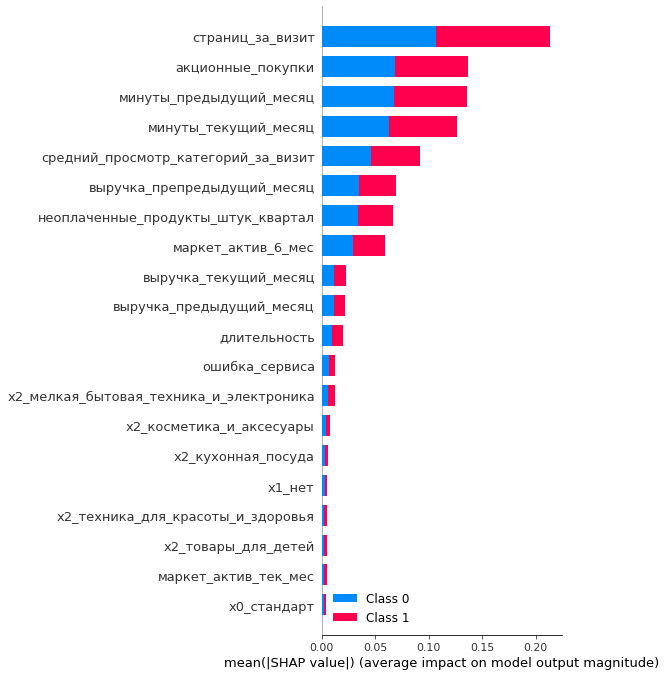

In [570]:
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_test_2)
shap.summary_plot(shap_values, X_test_2, plot_type="bar",feature_names = features_out) 

### Вывод по оценке важности признаков:
1. Наиболее важным признаком для модели стал признак "страниц_за_визит", у него была самая высокая корреляция с целевым. Это говорит о том, что пользователи, просматривающие много страниц за склонны к большим покупкам. При этом важно что бы пользователь нашел товар, который его заинтересует или получил скидочное предложение. Если человек просмотрев много страниц не нашел товар, который бы его устроил, он будет склонен к снижению покупательской активности.
2. Также одним из наиболее важных признаков является "акционные_покупки". Как мы помним из предшевствующего анализа, есть группа клиентов для которых акционные покупки являются доминирующеми. Стоит разработать более совершенную систему скидок и акций. Например использовать алгоритмы для подбора индивидуальных предложений на основе анализа покупательского поведения каждого пользователя. Это действительно важно, если клиент не получит подходящего предложения он с высокой вероятностью снизит свою покупательскую активнось и может уйти к конкуренту.
3. Далее рассмотрим сразу два признака идущих друг за другом: "минуты_предыдущий_месяц" и "минуты_текущий_месяц". Данные признаки так же активно влияют на покупательскую активность. Действительно, время проведенное на сайте оказывет влияние на возможность покупки того или иного товара. Не смотря на то, что между признаками нет мультиколлинеарности, это не значит, что признаки стоит рассматривать в отрыве друг от друга. Логично, что чем больше человек проводит времени на сайте, тем больше он просмотрит страниц в поисках подходящих ему товаров. Так же это связано и с акционными покупками, если за время проведенное на сайте клиент увидит хорошо подобранную акцию это повысит шанс на покупку. Жизненный опыт подсказывает, что для многих людей посещение подобных сайтов является своего рода привычкой или даже времяприпровождением, шопоголизм никто не отменял. Поэтому стоит рассмотреть так же рекомендательную систему, которая будет предлагать товары для пользователей в индивидуальном порядке.
4. Следом идет группа признаков, которые можно охарактеризовать, как средне-влияющие: "средний_просмотр_категорий_за_визит", "выручка_предыдущий_месяц", "неоплаченные_продукты_штук_квартал", "маркет_актив_6_мес". Стоит отметить не достаточно высокое влияние маркетинга, стоит пересмотреть маркетинговые программы дабы повысить их эффективность. Выручка влияет на покупателскую активность, но при этом человек может быть активным клиентом, но покупать только товары низкого ценового сегмента и наоборот. Неоплаченые товары в корзине говорят о том, что человек хочет приобрести товар, но нехватает какой то детали для совершения покупки, например он ждет снижения цены или скидочного предложения на данный товар или клиент недостаточно мотивирован в покупке, т.е. он не испытывает большой необходимости в покупке. Соит подтолкнуть его к этому используя акционные предложения.
5. Теперь рассмотрим признаки с наименьшим влиянием. Рассматривать будем выборочно, наиболее интересные закономерности. Несмотря на то, что практически каждый пользователь сталкивался со сбоем в работе сайта, этот признак не оказывает большого влияния на покупательскую активность, тем не менее это не повод не проводить работу над ошибками, т.к. мы рассматриваем этот признак в ограниченном временом промежутке, вполне возможно, что клинты могут устать от постоянных сбоев и уйти к конкурентам. Работа по улучшению сервиса должна вестись постоянно и как минимум быть нацеленна на не допущение прежних проблем. Популярная категория, в независимости какая, не оказывает заметного влияния на покупательскую активность. Трудно сказать с чем именно это связанно, нужно больше информации об асартименте. 
6. Отдельно рассмотрим наименее влияющий признак - "тип_сервиса". Как мы помним из анализа, большая часть людей используют стандартный тип сервиса. Нам не предоставили достаточно информации о том, что из себя представляет этот самый тип, в чем отличие одного от другого. Но одназначно можно сделать вывод о необходимости пересмотра этой самой сервисной программы, т.к. она практически никак не влияет на покупательскую активность.

##  Сегментация покупателей.

В данном шаге необходимо произвести сегментацию покупателей и разработать предложения, которые повысят покупательскую активность.

Добавим в таблицу с тестовыми данными прогноз вероятности снижения покупательской активности и прибыль.

In [571]:
X_test['вероятность'] = predicted_probabilities[:, 1]
X_test = X_test.merge(money_data, on='id', how='left')
X_test.sort_values(by='вероятность', ascending=False)
X_test.head()

,id,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минуты_предыдущий_месяц,минуты_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,вероятность,прибыль
0,216446,стандарт,да,5.3,5,433,0.91,техника_для_красоты_и_здоровья,1,1,0,7,15,20,4712.0,5160.0,5230.7,0.313333,4.47
1,215469,премиум,да,4.1,3,813,0.22,домашний_текстиль,3,3,4,5,12,8,5403.5,4889.0,5228.0,0.542665,3.76
2,216301,премиум,да,3.9,5,410,0.20,косметика_и_аксесуары,3,1,5,14,17,13,5052.5,5348.0,4926.4,0.085485,4.34
3,215713,стандарт,да,4.6,5,293,0.24,товары_для_детей,1,3,3,3,12,14,4821.0,4872.0,5221.4,0.653333,4.42
4,215500,стандарт,да,3.5,4,573,0.40,косметика_и_аксесуары,2,4,1,4,11,12,4137.0,4278.0,3808.1,0.986667,4.99


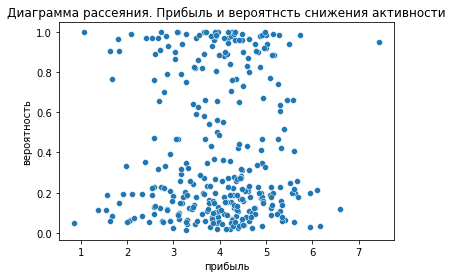

In [572]:
sns.scatterplot(data=X_test, y='вероятность', x='прибыль')
plt.title('Диаграмма рассеяния. Прибыль и вероятнсть снижения активности')
plt.show()

In [573]:
X_test['вероятность'].corr(X_test['прибыль'], method='spearman')

0.02490685962651009

График показывает отсутсвие линейной связи между прибылью и вероятностью снижения покупательской активности.

В качестве сегмента выделим клинтов с высокой вероятностью снежения покупательской активности и высокой прибылью.

In [574]:
target_clients = X_test[(X_test['вероятность']> 0.7)&(X_test['прибыль'] > 0.5)]
target_clients.head()

,id,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минуты_предыдущий_месяц,минуты_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,вероятность,прибыль
4,215500,стандарт,да,3.5,4,573,0.40,косметика_и_аксесуары,2,4,1,4,11,12,4137.0,4278.0,3808.1,0.986667,4.99
13,215642,премиум,да,3.8,4,962,0.30,косметика_и_аксесуары,2,2,2,5,7,7,4857.0,4419.0,5455.0,0.973333,3.48
19,215578,стандарт,да,2.4,4,699,0.35,мелкая_бытовая_техника_и_электроника,2,4,5,3,10,7,5328.5,4778.0,5801.7,0.960000,3.88
21,215483,стандарт,да,3.9,5,855,0.99,кухонная_посуда,2,6,7,6,8,8,6349.0,4834.0,6355.5,1.000000,2.74
22,215670,стандарт,да,4.1,4,490,0.98,кухонная_посуда,3,7,3,2,9,11,5415.0,4563.0,5723.1,1.000000,4.27


Построим график важности признаков для этого сегмента.

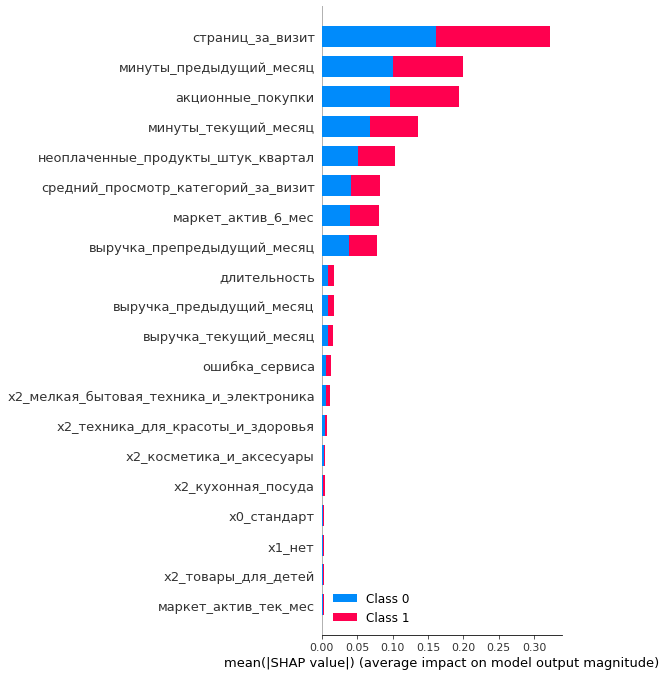

In [575]:
target_client_test = best_model.named_steps['preprocessor'].transform(target_clients.drop(['id','прибыль'],axis=1))
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(target_client_test)

shap.summary_plot(shap_values, target_client_test, plot_type="bar",feature_names = features_out) 

Для данной категории покупателей, так же как и для всех клиентов, наиболее важным признаком является "страниц_за_визит". Так же важную роль играют минуты проведенные на сайте. Акционные покупки оказывают существенное влияние для этой группы. Как и для основной группы пользователей, тип сервиса не играет какой либо значимой роли.

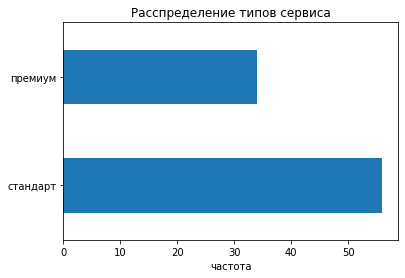

In [576]:
target_clients['тип_сервиса'].value_counts().plot.barh()
plt.title('Расспределение типов сервиса')
plt.xlabel('частота')
plt.show()

На графике видим, что большая часть пользователей в данном сегменте используют стандартный ти сервиса.

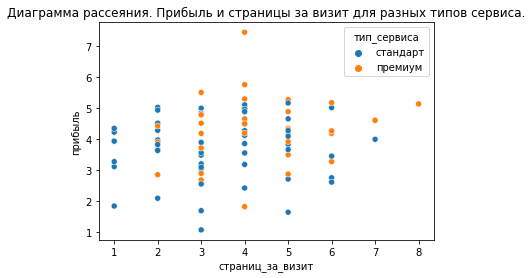

In [577]:
sns.scatterplot(data=target_clients, x='страниц_за_визит', y='прибыль', hue='тип_сервиса')
plt.title('Диаграмма рассеяния. Прибыль и страницы за визит для разных типов сервиса.')
plt.show()

Диаграмма показывает расспределение прибыли в зависимоти от просмотренных страниц за визит для пользователей разных типов сервиса. Кол-во просмотренных страниц за визит не имеет прямого влияния на прибыль. Можем наблюдать немного более высокие значения прибыли для пользователей с сервисом "премиум".

In [578]:
target_clients['акционные_покупки'].describe()

count    90.000000
mean      0.532556
std       0.307153
min       0.120000
25%       0.292500
50%       0.375000
75%       0.900000
max       0.990000
Name: акционные_покупки, dtype: float64

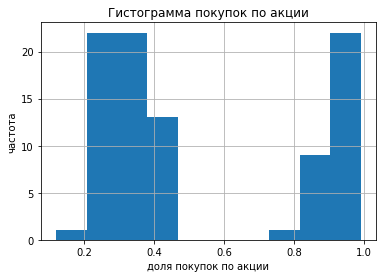

In [579]:
target_clients['акционные_покупки'].hist()
plt.title('Гистограмма покупок по акции')
plt.xlabel('доля покупок по акции')
plt.ylabel('частота')
plt.show()

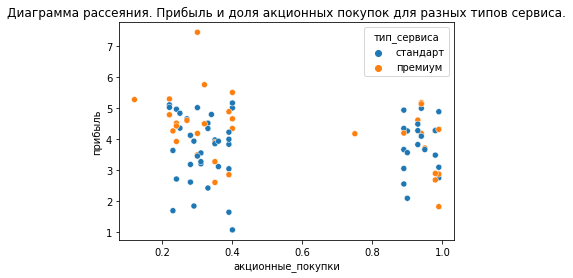

In [580]:
sns.scatterplot(data=target_clients, x='акционные_покупки', y='прибыль', hue='тип_сервиса')
plt.title('Диаграмма рассеяния. Прибыль и доля акционных покупок для разных типов сервиса.')
plt.show()

Доля покупок по акции, в основном находится в диапозоне от 29% до 90%, так же есть часть клиентов, для которых это доля составляет практически 100%. Диаграмме рассеяния показывает немного более высокие значения прибыли для клиентов с типом сервиса "премиум". 

In [581]:
target_clients['неоплаченные_продукты_штук_квартал'].describe()

count    90.000000
mean      4.133333
std       2.394751
min       0.000000
25%       2.250000
50%       4.000000
75%       6.000000
max      10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

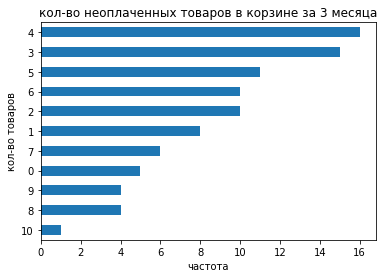

In [582]:
target_clients['неоплаченные_продукты_штук_квартал'].value_counts().sort_values().plot.barh()
plt.title('кол-во неоплаченных товаров в корзине за 3 месяца')
plt.xlabel('частота')
plt.ylabel('кол-во товаров')
plt.show()

Большая часть клиентов имеют от 2 до 6 неоплаченных товара в корзине, 3-4 штуки самое расспространенное явление. 

### Вывод по сегментации покупателей:
1. В качестве сегмента были выбраны покупатели с высокой вероятностью снижения покупательской активности и высокими значениями выручки. 
2. Для данной категории покупателей, так же как и для всех клиентов, наиболее важным признаком является "страниц_за_визит". Так же важную роль играют минуты проведенные на сайте. Акционные покупки оказывают существенное влияние для этой группы. Как и для основной группы пользователей, тип сервиса не играет какой либо значимой роли.
3. Большая часть пользователей в данном сегменте используют стандартный ти сервиса.
4. Кол-во просмотренных страниц за визит не имеет прямого влияния на прибыль. Можем наблюдать немного более высокие значения прибыли для пользователей с сервисом "премиум".
5. Доля покупок по акции, в основном находится в диапозоне от 29% до 90%, так же есть часть клиентов, для которых это доля составляет практически 100%. Диаграмме рассеяния показывает немного более высокие значения прибыли для клиентов с типом сервиса "премиум".
6. Большая часть клиентов имеют от 2 до 6 неоплаченных товара в корзине, 3-4 штуки самое расспространенное явление.

### Рекомендации для данного сегмента:
Исходя из того, что большая часть пользователей данного сегмента пользуются стандартным типом сервиса и при этом наблюдается немного более высокие значения прибыли для пользователей с сервисом типа премиум, стоит пересмотреть сервисную программу. Пользователи с высокой покупательской способностью должны пользоваться преимуществами. Сервис программа должна предостовлять заметную разницу в сравнение с стандартной. Программа лоялбности может включать в себя накопительную систему скидок, бонусы в виде кэшбека либо промокоды или скидки на дополнительные покупки. Так же будут актульны индивидуальные предложения на основе предпочтений конкретного пользователя. Это будет особенно актуально для той подгруппы, которая в основном приобретает товары по акциям. Для многих клиентов характерно наличие неоплаченных товаров в корзине. Это еще одна возможность для доп продажи, необходимо провести доп. исследование, что бы точнее понять по какой причине люди не покупают сразу эти товары и на основе этой информации при помощи различных маркетинговых манипуляций повысить продажи.

# 9. Общий вывод.
Перед нами стояла задача разработать модель, которая предскажет вероятность снижения покупательской активности и выделите сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность. 
<br>
В ходе работы были выполнены следующие шаги:
1. Загрузка данных - названия столбцов были приведены к нижнему и змеиному регистрам. Для таблицы с прибылью в качестве разделителя числа была выбрана точка.<br>
<br>
2. Предобработка данных - в столбце 'тип_сервиса' был обнаружен неявный дубликат : 'стандартт' и 'стандарт'. Обнаружили опечатку в столбце 'период'. В остальном данные впорядке, пропусков и дубликатов нет.<br>
<br>
3. Исследовательский анализ:
1) Покупательская активность клиентов в основном на прежнем уровне. При этом доля сниженой активности так же высока.
2) В основном люди используют стандартный тип сервиса.
3) Клиенты достаточно охотно соглашаются на рассылку.
4) Кол-во маркетинговых коммуникаций, в соновном, лежит в диапозоне от 3.7 до 4.9. На боксплоте заметили 4 выброса в нижней части графика. Оставим эти данные т.к. они не повлияют на исследование.
5) Маркетинговая активность в текущем месяце по большей части, находится в кол-ве 4 коммуникаций с клиентом.
6) В основном, длительность нахождения на сайте лежит в диапозоне от 405 до 806 дней.
7) Для большинства клиентов доля акционных покупок лежит в диапозоне от 17 до 30 процентов. На боксплоте увидели выбросы в верхней части. Это клиенты, которые покупают практически только товары по акциям.
8) Среди популярных категорий: первое место - товары для детей, второе - домашний текстиль, третье - косметика и аксесуары, четвертое - техника для красоты и здоровья, пятое - мелкая бытовая техника и электроника.
9) Среднее кол-во просмотренных категорий за визит: чаще всего - 3 просмотренных категории, следом 2 категории, далее 4 категории за визит, реже всего одна и шесть категорий за визит.
10) 1-2 неоплаченных товара в корзине за 3 месяца - самое расппрастроненное явление. Далее по 3 и 4 товара. Следом 5 и 0. Остальные значения встречаются достаточно редко.
11) В основном, клиенты стлакиваются с 2-5 сбоями. Так же стоит заметить, что 0 сбоев - это практически такая же редкость как 9 сбоев. Это показывает, что сбои это , с чем клиенты регулярно имееют дело.
12) По статистике за 3 месяца, в основной массе, клиенты просматривают от 4 до 11 страниц за один визит. При этом одну страницу просматривают так же редко, как и большое кол-во сраниц(16 и выше).
13) На графике можем наблюдать рост выручки в теченее последних месяцев.
14) Время, проведенное пользователями на сайте, незначительно уменьшилось в текущем месяце.
15) В основном, прибыль лежит в диапозоне от 3.3 до 4.7. На боксплоте видны выбросы в верхней и нежней части графика. Это говорит о присутсвии как сверхприбыльных, так и низкоприбыльных клиентах. <br>
<br>
Для дальнейшего исследования оставили только тех клиентов, у которых были покупки за последние 3 месяца.<br>
<br>
4. Объединение таблиц - три таблицы были объединены в одну.<br>
<br>
5.  Корреляционный анализ:<br>
1) Наиболее высокая корреляция у целевого признака("покупательская_активность") с "страниц_за_визит" - 0.75.<br>
2) Так же с признаком "минуты_предыдущий_месяц" корреляция составляет 0.69.<br>
3) Для остальных признаков корреляция менее либо практически не выраженна.<br>
4) В признаках не наблюдается мультиколлинеарности.<br>
5) Для пользователей, чья покупательская активнось снизилась мы наблюдаем: <br>
        1) Более выраженную зависимость между кол-вом просмотренных страниц и минутами проведенными на сайте. Это вполне логично и не является чем то аномальным.
        2) Так же наблюдается связь между выручкой в предыдущем месяце и временем проведенным на сайте в этом месяце.
        6) Пользователи с прежним уровнем покупательской активности:
        1) Заметна выраженная зависимость между выручкой в текущем месяце и предыдущем - 0.87. Это можно объяснить тем, что активные клиенты совершают покупки от месяца к месяцу, этим и объясняется неснижающийся уровень покупательской активности.  
<br>
6.  Использование пайплайна:<br>
1) В данной работе был создан пайплайн для предварительной обработки, кодировки, подбору модели и ее параметров. Всего перебирали 5 моделей: SVC(), LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier() и DecisionTreeClassifier(). <br> 
2) В результате, лучшая модель - RandomForestClassifier(). Ее параметры: максимальная глубина дерева - 17, кол-во деревьев - 150. Метрики "ROC-AUC": на тренировочной выборке - 0.9145146725237634, на тестовой выборке: 0.896364949446317.
<br>
7. Вывод по оценке важности признаков:
1) Наиболее важным признаком для модели стал признак "страниц_за_визит", у него была самая высокая корреляция с целевым. Это говорит о том, что пользователи, просматривающие много страниц за склонны к большим покупкам. При этом важно что бы пользователь нашел товар, который его заинтересует или получил скидочное предложение. Если человек просмотрев много страниц не нашел товар, который бы его устроил, он будет склонен к снижению покупательской активности.
2) Также одним из наиболее важных признаков является "акционные_покупки". Как мы помним из предшевствующего анализа, есть группа клиентов для которых акционные покупки являются доминирующеми. Стоит разработать более совершенную систему скидок и акций. Например использовать алгоритмы для подбора индивидуальных предложений на основе анализа покупательского поведения каждого пользователя. Это действительно важно, если клиент не получит подходящего предложения он с высокой вероятностью снизит свою покупательскую активнось и может уйти к конкуренту.
3) Далее рассмотрим сразу два признака идущих друг за другом: "минуты_предыдущий_месяц" и "минуты_текущий_месяц". Данные признаки так же активно влияют на покупательскую активность. Действительно, время проведенное на сайте оказывет влияние на возможность покупки того или иного товара. Не смотря на то, что между признаками нет мультиколлинеарности, это не значит, что признаки стоит рассматривать в отрыве друг от друга. Логично, что чем больше человек проводит времени на сайте, тем больше он просмотрит страниц в поисках подходящих ему товаров. Так же это связано и с акционными покупками, если за время проведенное на сайте клиент увидит хорошо подобранную акцию это повысит шанс на покупку. Жизненный опыт подсказывает, что для многих людей посещение подобных сайтов является своего рода привычкой или даже времяприпровождением, шопоголизм никто не отменял. Поэтому стоит рассмотреть так же рекомендательную систему, которая будет предлагать товары для пользователей в индивидуальном порядке.
4) Следом идет группа признаков, которые можно охарактеризовать, как средне-влияющие: "средний_просмотр_категорий_за_визит", "выручка_предыдущий_месяц", "неоплаченные_продукты_штук_квартал", "маркет_актив_6_мес". Стоит отметить не достаточно высокое влияние маркетинга, стоит пересмотреть маркетинговые программы дабы повысить их эффективность. Выручка влияет на покупателскую активность, но при этом человек может быть активным клиентом, но покупать только товары низкого ценового сегмента и наоборот. Неоплаченые товары в корзине говорят о том, что человек хочет приобрести товар, но нехватает какой то детали для совершения покупки, например он ждет снижения цены или скидочного предложения на данный товар или клиент недостаточно мотивирован в покупке, т.е. он не испытывает большой необходимости в покупке. Соит подтолкнуть его к этому используя акционные предложения.
5) Теперь рассмотрим признаки с наименьшим влиянием. Рассматривать будем выборочно, наиболее интересные закономерности. Несмотря на то, что практически каждый пользователь сталкивался со сбоем в работе сайта, этот признак не оказывает большого влияния на покупательскую активность, тем не менее это не повод не проводить работу над ошибками, т.к. мы рассматриваем этот признак в ограниченном временом промежутке, вполне возможно, что клинты могут устать от постоянных сбоев и уйти к конкурентам. Работа по улучшению сервиса должна вестись постоянно и как минимум быть нацеленна на не допущение прежних проблем. Популярная категория, в независимости какая, не оказывает заметного влияния на покупательскую активность. Трудно сказать с чем именно это связанно, нужно больше информации об асартименте. 
6) Отдельно рассмотрим наименее влияющий признак - "тип_сервиса". Как мы помним из анализа, большая часть людей используют стандартный тип сервиса. Нам не предоставили достаточно информации о том, что из себя представляет этот самый тип, в чем отличие одного от другого. Но одназначно можно сделать вывод о необходимости пересмотра этой самой сервисной программы, т.к. она практически никак не влияет на покупательскую активность.<br>
<br>
8. Сегментация покупателей:<br>
1 Вывод по сегментации покупателей:<br>
1) В качестве сегмента были выбраны покупатели с высокой вероятностью снижения покупательской активности и высокими значениями выручки. 
2) Для данной категории покупателей, так же как и для всех клиентов, наиболее важным признаком является "страниц_за_визит". Так же важную роль играют минуты проведенные на сайте. Акционные покупки оказывают существенное влияние для этой группы. Как и для основной группы пользователей, тип сервиса не играет какой либо значимой роли.
3) Большая часть пользователей в данном сегменте используют стандартный ти сервиса.
4) Кол-во просмотренных страниц за визит не имеет прямого влияния на прибыль. Можем наблюдать немного более высокие значения прибыли для пользователей с сервисом "премиум".
5) Доля покупок по акции, в основном находится в диапозоне от 29% до 90%, так же есть часть клиентов, для которых это доля составляет практически 100%. Диаграмме рассеяния показывает немного более высокие значения прибыли для клиентов с типом сервиса "премиум".
6) Большая часть клиентов имеют от 2 до 6 неоплаченных товара в корзине, 3-4 штуки самое расспространенное явление.
2. Рекомендации для данного сегмента:<br>
Исходя из того, что большая часть пользователей данного сегмента пользуются стандартным типом сервиса и при этом наблюдается немного более высокие значения прибыли для пользователей с сервисом типа премиум, стоит пересмотреть сервисную программу. Пользователи с высокой покупательской способностью должны пользоваться преимуществами. Сервис программа должна предостовлять заметную разницу в сравнение с стандартной. Программа лоялбности может включать в себя накопительную систему скидок, бонусы в виде кэшбека либо промокоды или скидки на дополнительные покупки. Так же будут актульны индивидуальные предложения на основе предпочтений конкретного пользователя. Это будет особенно актуально для той подгруппы, которая в основном приобретает товары по акциям. Для многих клиентов характерно наличие неоплаченных товаров в корзине. Это еще одна возможность для доп продажи, необходимо провести доп. исследование, что бы точнее понять по какой причине люди не покупают сразу эти товары и на основе этой информации при помощи различных маркетинговых манипуляций повысить продажи.